In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from bs4 import BeautifulSoup
from IPython.display import display_html
import requests
import re
import seaborn as sns
import json

In [10]:
url = "https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City"
data = pd.read_html(url)[0] # population data

In [477]:
crimes = pd.read_csv('Neighborhood_Shooting_Incidences_in_2018_data.csv')
crimes.rename({'Ntaname (New Nynta.Shp)':'Neighborhoods'},axis=1,inplace = True)
crimes.sort_values(['Neighborhoods'],ascending= True,inplace=True)
crimes.reset_index(drop= True,inplace=True)

In [255]:
list_crimes = []
#separated_data = data[['Areakm2','Pop.Census2010','Pop./km2']]
for x in range(len(crimes['Neighborhoods'])):
    try:
        for y in crimes['Neighborhoods'][x].split('-'):
            
            new_list = []
            new_list.append(y)
            new_list.append(crimes['Latitude (generated)'][x])
            new_list.append(crimes['Longitude (generated)'][x])
            new_list.append(crimes['Number of Records'][x])
            list_crimes.append(new_list)
            #print(data[['Areakm2','Pop.Census2010','Pop./km2']])
            #print(new_list)
    except AttributeError:
        pass
count = 0
separate_crimes = pd.DataFrame(list_crimes,columns=['Neighborhood','Latitude (generated)','Longitude (generated)','Number of Records'])

In [478]:
crimes_by_borough = crimes.groupby(['Boroname']).sum()

In [479]:
crimes_by_borough

,Latitude (generated),Longitude (generated),Number of Records
Boroname,,,
Bronx,1511.365894,-2733.533509,303
Brooklyn,2032.525347,-3697.774427,379
Manhattan,1141.668676,-2071.127121,118
Queens,2280.295424,-4134.100310,171
Staten Island,730.589248,-1334.474330,34


In [480]:
crimes_per_borough = crimes_by_borough['Number of Records']

In [69]:
median_housing_prices = pd.read_csv('medianAskingRent_OneBd_v2.csv')

In [116]:
median_housing_prices.drop([0,1,2,3,4],inplace=True) # removing the first few rows
median_housing_prices.reset_index(drop=True,inplace = True)
median_values_avg = median_housing_prices[['areaName','Borough','areaType','average_2018']]# i only need the data from average_2018
grouped_borough = median_values_avg.groupby('Borough').mean() # Getting the mean on a per borough basis

In [261]:
grouped_borough.reset_index(inplace=True)

In [481]:
crimes_by_borough.reset_index(inplace = True)
crimes_by_borough.rename({'Boroname':'Borough'},axis=1,inplace=True)

In [482]:
crime_cost_per_borough = grouped_borough.merge(crimes_by_borough,on= 'Borough')

In [484]:
crime_cost_per_borough

,Borough,average_2018,Latitude (generated),Longitude (generated),Number of Records
0,Bronx,1580.701989,1511.365894,-2733.533509,303
1,Brooklyn,2173.083474,2032.525347,-3697.774427,379
2,Manhattan,3200.240714,1141.668676,-2071.127121,118
3,Queens,1814.897074,2280.295424,-4134.100310,171
4,Staten Island,1621.333333,730.589248,-1334.474330,34


In [485]:
crime_cost_per_borough.drop(['Latitude (generated)','Longitude (generated)'],axis=1,inplace=True)

In [286]:
crime_cost_per_borough.set_index('Borough',inplace =True)


KeyError: "None of ['Borough'] are in the columns"

In [295]:
crime_cost_per_borough.rename({'Number of Records':'Number of Gun Related Homicides','average_2018':'Average Apartment cost in 2018'},axis=1,inplace= True)

,average_2018,Areakm2,Pop.Census2010,Pop./km2,Latitude (generated),Longitude (generated),Number of Records,Number Venues
Borough,,,,,,,,
Bronx,52056.861112,313.80,4066802,516855,1348.071177,-2437.762891,311,699
Brooklyn,83524.233888,446.88,5757205,578942,1625.682352,-2958.504492,204,1056
Manhattan,52231.989999,138.46,2334113,456253,733.696498,-1331.596606,54,490
Queens,97576.148486,1089.84,8784220,539915,2158.478318,-3912.647880,150,1393


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000176EBEB4808>,
      dtype=object)

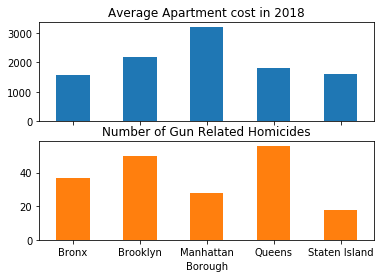

In [296]:
crime_cost_per_borough.plot.bar(subplots=True, legend =False,rot = 0)

In [122]:
#replacing all of the NaNs with averages by each individual borough
values = {'Bronx':1580.7,"Brooklyn":2173.08,'Manhattan':3200.24,'Queens':1814.90,'Staten Island': 1621.33}
for i, x in enumerate(pd.isna(median_values_avg['average_2018'])):
    if x:
        median_values_avg['average_2018'][i] = values[median_values_avg['Borough'][i]]

In [230]:
median_values_avg.rename({'areaName':'Neighborhood'},axis=1,inplace = True)

C:\Users\bmehl\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [ ]:
# this mess was so that each individual neighborhood was accounted for and assumed to be the same for each one
list_neighborhoods = []
for x in range(len(data['Neighborhoods'])):
    try:
        
        for y in data['Neighborhoods'][x].split(', '):
            new_list = []
            new_list.append(y)
            new_list.append(data['Areakm2'][x])
            new_list.append(data['Pop.Census2010'][x])
            new_list.append(data['Pop./km2'][x])
            list_neighborhoods.append(new_list)
    except AttributeError:
        pass
count = 0
separate_neighborhoods = pd.DataFrame(list_neighborhoods,columns=['Neighborhood','Areakm2','Pop.Census2010','Pop./km2'])

In [243]:
df_apart_areas = median_values_avg.merge(separate_neighborhoods,on='Neighborhood')

In [297]:
df_apart_crimes = df_apart_areas.merge(separate_crimes,on='Neighborhood')

In [ ]:
CLIENT_ID = '2OKGLSEMOQJCWPJ4ZHWUMBCGLL4CWEDWK24LQ4SMBKHKKDOD' # your Foursquare ID
CLIENT_SECRET = '21QKTXIK15XM5AYRXYHNA3SCGEFBDBRQKWBDZB0NAR5W3AOL' # your Foursquare Secret
VERSION = '20180604'
location = 'Annadale,NY'
url_foursquare = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&near={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, location, VERSION)

In [ ]:
results = requests.get(url_foursquare).json()

In [ ]:
'There are {} around {}'.format(len(results['response']['groups'][0]['items']),location)

In [315]:
venue_number_list = []
count = 0
for x in df_apart_crimes.iterrows():
    print(count)
    location = x[1]['Neighborhood']+',NY'
    url_foursquare = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&near={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, location, VERSION)
    results = requests.get(url_foursquare).json()
    count +=1
    try:
        venue_number_list.append(len(results['response']['groups'][0]['items']))
    except KeyError:
        venue_number_list.append(len(results['response']))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


In [322]:
df_apart_crimes.head(10)

,Neighborhood,Borough,areaType,average_2018,Areakm2,Pop.Census2010,Pop./km2,Latitude (generated),Longitude (generated),Number of Records
0,Astoria,Queens,neighborhood,1888.166667,14.97,211220,14110,40.761509,-73.918875,9
1,Auburndale,Queens,neighborhood,1775.000000,24.99,116404,4658,40.750251,-73.790345,1
2,Bath Beach,Brooklyn,neighborhood,1538.777778,10.18,172129,16909,40.602496,-74.008867,1
3,Battery Park City,Manhattan,neighborhood,3714.166667,4.45,34420,7735,40.705311,-74.010584,1
4,Bay Ridge,Brooklyn,neighborhood,1684.666667,10.57,122542,11593,40.625064,-74.029117,1
5,Baychester,Bronx,neighborhood,1580.700000,14.56,152344,10463,40.881425,-73.831165,3
6,Bayside,Queens,neighborhood,1693.750000,24.99,116404,4658,40.762838,-73.767862,2
7,Bedford Park,Bronx,neighborhood,1580.700000,4.84,139286,28778,40.868959,-73.889278,3
8,Bellerose,Queens,neighborhood,1814.900000,33.31,196284,5893,40.734357,-73.728550,1
9,Belmont,Bronx,neighborhood,1575.000000,4.01,83268,20765,40.858431,-73.885285,8


In [325]:
df_apart_crimes['Number Venues'] = venue_number_list

In [334]:
num_venues_borough = df_apart_crimes.groupby('Borough').sum()

In [355]:
num_venues_borough

,average_2018,Areakm2,Pop.Census2010,Pop./km2,Latitude (generated),Longitude (generated),Number of Records,Number Venues
Borough,,,,,,,,
Bronx,52056.861112,313.80,4066802,516855,1348.071177,-2437.762891,311,699
Brooklyn,83524.233888,446.88,5757205,578942,1625.682352,-2958.504492,204,1056
Manhattan,52231.989999,138.46,2334113,456253,733.696498,-1331.596606,54,490
Queens,97576.148486,1089.84,8784220,539915,2158.478318,-3912.647880,150,1393


In [356]:
num_venues_borough = num_venues_borough[['Number Venues']]

In [363]:
num_venues_borough.reset_index(inplace=True)

In [389]:
df_holder.reset_index(inplace = True)

In [491]:
total_borough_info.drop(['index'],axis=1,inplace=True)

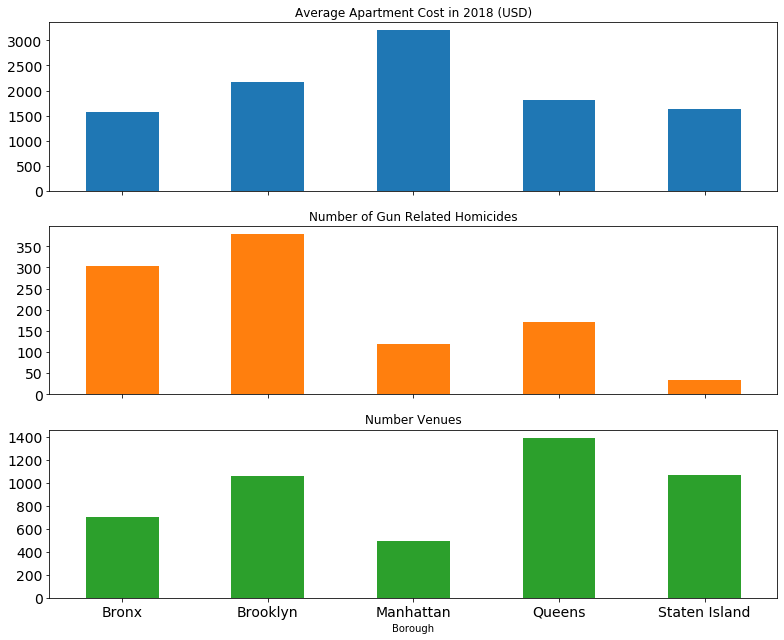

In [496]:
total_borough_info.rename({'average_2018':'Average Apartment Cost in 2018 (USD)','Number of Records':'Number of Gun Related Homicides'},axis=1,inplace=True)
ax = total_borough_info.plot.bar(subplots=True, legend =False,rot = 0,figsize =(11,9),fontsize = 14)
plt.tight_layout()
plt.savefig('Borough Overview.png')

In [402]:
crime_cost_per_borough

,Average Apartment cost in 2018,Number of Gun Related Homicides
Borough,,
Bronx,1580.701989,37
Brooklyn,2173.083474,50
Manhattan,3200.240714,28
Queens,1814.897074,56
Staten Island,1621.333333,18


number of venues in staten island since apartment data has no individual locations for staten island

In [348]:
neighborhoods_list_staten_island = []
for x in crimes[crimes['Boroname']=='Staten Island'].iterrows():
    for y in x[1]['Neighborhoods'].split('-'):
        neighborhoods_list_staten_island.append(y)

In [351]:
venue_number_list = []
for x in neighborhoods_list_staten_island:
    location = x+',NY'
    url_foursquare = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&near={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, location, VERSION)
    results = requests.get(url_foursquare).json()
    try:
        venue_number_list.append(len(results['response']['groups'][0]['items']))
    except KeyError:
        venue_number_list.append(len(results['response']))

In [353]:
value = sum(venue_number_list)
df_holder = pd.DataFrame([value],index = ['Staten Island'])

1066

In [486]:
#df_holder.reset_index(inplace = True)
#df_holder.rename({'index': 'Borough'},axis = 1,inplace = True)
#df_holder.rename({0:'Number Venues'},axis = 1,inplace = True)
#num_venues_borough = pd.concat([num_venues_borough,df_holder])
crime_cost_per_borough.reset_index(inplace = True)
total_borough_info = crime_cost_per_borough.merge(num_venues_borough,on = 'Borough',)
total_borough_info.set_index('Borough',inplace =True)
total_borough_info

,index,average_2018,Number of Records,Number Venues
Borough,,,,
Bronx,0,1580.701989,303,699
Brooklyn,1,2173.083474,379,1056
Manhattan,2,3200.240714,118,490
Queens,3,1814.897074,171,1393
Staten Island,4,1621.333333,34,1066


In [419]:
df_apart_crimes

,Neighborhood,Borough,areaType,average_2018,Areakm2,Pop.Census2010,Pop./km2,Latitude (generated),Longitude (generated),Number of Records,Number Venues
0,Astoria,Queens,neighborhood,1888.166667,14.97,211220,14110,40.761509,-73.918875,9,30
1,Auburndale,Queens,neighborhood,1775.000000,24.99,116404,4658,40.750251,-73.790345,1,0
2,Bath Beach,Brooklyn,neighborhood,1538.777778,10.18,172129,16909,40.602496,-74.008867,1,30
3,Battery Park City,Manhattan,neighborhood,3714.166667,4.45,34420,7735,40.705311,-74.010584,1,30
4,Bay Ridge,Brooklyn,neighborhood,1684.666667,10.57,122542,11593,40.625064,-74.029117,1,30
...,...,...,...,...,...,...,...,...,...,...,...
139,Williamsburg,Brooklyn,neighborhood,2760.250000,12.82,160338,12507,40.704002,-73.958096,1,30
140,Windsor Terrace,Brooklyn,neighborhood,2205.000000,10.96,120063,10955,40.655279,-73.977497,1,30
141,Woodhaven,Queens,neighborhood,1600.000000,10.08,141608,14048,40.687620,-73.854865,1,30
142,Woodlawn,Bronx,neighborhood,1580.700000,14.56,152344,10463,40.899901,-73.856745,28,30


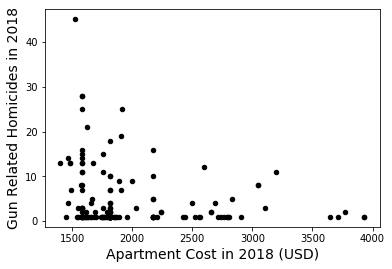

In [493]:
#sns.scatterplot(x = 'average_2018', y = 'Number of Records',data = df_apart_crimes,labels_)
df_apart_crimes.plot(kind='scatter',x = 'average_2018',y='Number of Records',c= 'k')
plt.xlabel('Apartment Cost in 2018 (USD)',fontsize = 14)
plt.ylabel('Gun Related Homicides in 2018',fontsize = 14)
plt.savefig('Apartment vs Homicides.png')

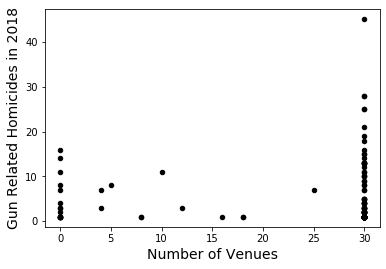

In [446]:
df_apart_crimes.plot(kind='scatter',x = 'Number Venues',y='Number of Records',c= 'k')
plt.xlabel('Number of Venues',fontsize = 14)
plt.ylabel('Gun Related Homicides in 2018',fontsize = 14)
plt.savefig('Venue vs Homicides.png')

clusters fo apartment cost compared to gun related homicides

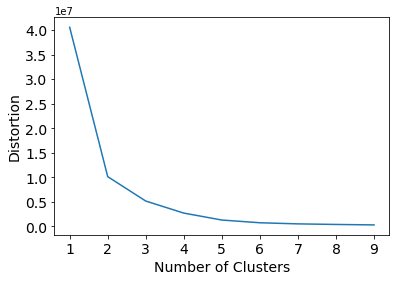

In [505]:
x_data = df_apart_crimes[['average_2018','Number of Records']]
kmeans_score = []
for x in range(1,10):
    kmeans = KMeans(n_clusters= x)
    kmeans.fit(x_data)
    kmeans_score.append(abs(kmeans.score(x_data)))
plt.plot(range(1,10),kmeans_score)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Clusters',fontsize=14)
plt.ylabel('Distortion',fontsize=14)
plt.savefig('Optimal clusters_apartment.png')

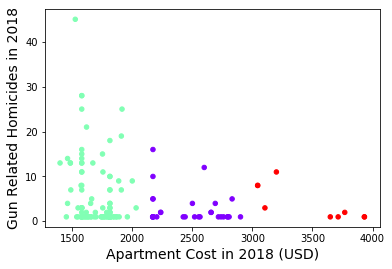

In [470]:
x_data = df_apart_crimes[['average_2018','Number of Records']]
kmeans = KMeans(n_clusters= 3)
kmeans.fit(x_data)
kmeans_score.append(abs(kmeans.score(x_data)))
#plt.plot(range(1,10),kmeans_score)
df_apart_crimes.plot(kind='scatter',x = 'average_2018',y='Number of Records',c= kmeans.labels_,cmap='rainbow',colorbar=False)
plt.xlabel('Apartment Cost in 2018 (USD)',fontsize = 14)
plt.ylabel('Gun Related Homicides in 2018',fontsize = 14)
plt.savefig('Apartment vs Homicides_clusters.png')

In [471]:
df_apart_crimes['Clusters Apart Vs Homicides'] = kmeans.labels_

clusters for number of venues compared ot gun related homicides

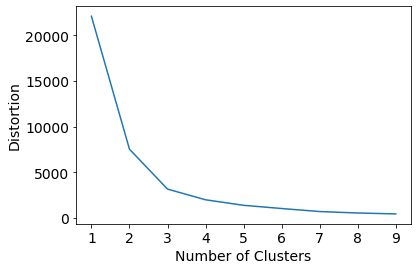

In [504]:
x_data = df_apart_crimes[['Number Venues','Number of Records']]
kmeans_score = []
for x in range(1,10):
    kmeans = KMeans(n_clusters= x)
    kmeans.fit(x_data)
    kmeans_score.append(abs(kmeans.score(x_data)))
plt.plot(range(1,10),kmeans_score)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Clusters',fontsize=14)
plt.ylabel('Distortion',fontsize=14)
plt.savefig('Optimal clusters_venues.png')

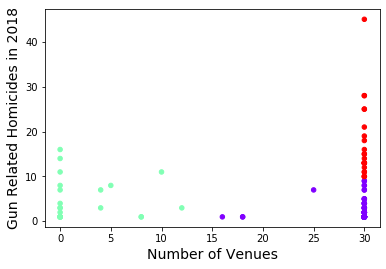

In [475]:
x_data = df_apart_crimes[['Number Venues','Number of Records']]
kmeans = KMeans(n_clusters= 3)
kmeans.fit(x_data)
df_apart_crimes.plot(kind='scatter',x = 'Number Venues',y='Number of Records',c= kmeans.labels_,cmap='rainbow',colorbar=False)
plt.xlabel('Number of Venues',fontsize = 14)
plt.ylabel('Gun Related Homicides in 2018',fontsize = 14)
plt.savefig('Venue vs Homicides_clusters.png')

In [468]:
df_apart_crimes['Clusters Venues Vs Homicides'] = kmeans.labels_

In [469]:
df_apart_crimes

,Neighborhood,Borough,areaType,average_2018,Areakm2,Pop.Census2010,Pop./km2,Latitude (generated),Longitude (generated),Number of Records,Number Venues,Clusters Apart Vs Homicides,Clusters Venues Vs Homicides
0,Astoria,Queens,neighborhood,1888.166667,14.97,211220,14110,40.761509,-73.918875,9,30,1,3
1,Auburndale,Queens,neighborhood,1775.000000,24.99,116404,4658,40.750251,-73.790345,1,0,1,0
2,Bath Beach,Brooklyn,neighborhood,1538.777778,10.18,172129,16909,40.602496,-74.008867,1,30,1,1
3,Battery Park City,Manhattan,neighborhood,3714.166667,4.45,34420,7735,40.705311,-74.010584,1,30,3,1
4,Bay Ridge,Brooklyn,neighborhood,1684.666667,10.57,122542,11593,40.625064,-74.029117,1,30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Williamsburg,Brooklyn,neighborhood,2760.250000,12.82,160338,12507,40.704002,-73.958096,1,30,2,1
140,Windsor Terrace,Brooklyn,neighborhood,2205.000000,10.96,120063,10955,40.655279,-73.977497,1,30,0,1
141,Woodhaven,Queens,neighborhood,1600.000000,10.08,141608,14048,40.687620,-73.854865,1,30,1,1
142,Woodlawn,Bronx,neighborhood,1580.700000,14.56,152344,10463,40.899901,-73.856745,28,30,1,2


In [499]:
df_apart_crimes[['average_2018','Number of Records','Number Venues']].corr()

,average_2018,Number of Records,Number Venues
average_2018,1.000000,-0.208990,0.122497
Number of Records,-0.208990,1.000000,0.029904
Number Venues,0.122497,0.029904,1.000000
